<a href="https://colab.research.google.com/github/plance17/Redes-Neuronales-UNSAM/blob/main/Practico0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def euler(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Euler.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    return x + dt*f(x,t,p)

In [ ]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [ ]:

def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

# **Ejercicio 1**:


Considere la Ecuación Diferencial Ordinaria (ODE)

$$\dot{x}=-a x + b$$
donde $a,b > 0$.

1.Encuentre el/los puntos fijos.

2.Determine la estabilidad lineal de el/los mismo/s.

3.Use el método de integración de Runge Kutta de orden 4 para calcular la trayectoria de la solución $x(0)=1$ usando $k=20$ pasos de integración en $t\in [0,5]$ para $a=2$ y $b=3$.

4.Grafique la trayectoria $x(t)$. Compare con la solución exacta de condicion inicial $x(0)=x_0$:
$$\begin{eqnarray}
x(t) = \bigg(x_0-\frac{b}{a}\bigg)e^{-at}+\frac{b}{a} \\
\end{eqnarray}$$

5.Grafique $\dot{x}$ vs $x$. Incluya:

a. Los puntos fijos, en blanco si son inestables, en negro si son estables y en rojo si son linealmente marginales.

b. En gris a rayas, la linea $\dot{x}=0$ para todo $x$.

c. En azul, flechas que indiquen la dirección de cambio en cada región entre puntos fijos, incluyendo los puntos $x = \pm \infty$.




Para punto c usar plt.arrow

1.Los puntos fijos del sistema se obtienen a partir de

$\dot{x}=0$   $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$  $-ax+b=0$  $\hspace{0.3cm}$ $\rightarrow$  $\hspace{0.3cm}$  $x^*=\frac{b}{a}$

2.Estabilidad del punto fijo.

$\dot{x}=f(x)$   $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ $f(x)=-ax+b$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ $f'(x)=-a<0$.

Como la pendiente en el punto fijo del sistema es menor a cero el punto fijo es estable.




3.

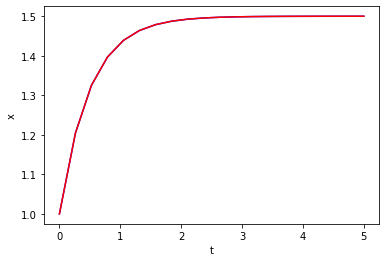

In [ ]:
a=2
b=3
k=20

t=np.linspace(0,5,k)

x0=1

x=np.zeros(k)

x[0]=x0

def f(x,t,a,b):
  y=-a*x+b
  return y

dt=t[1]-t[0]
for i in np.arange(0,k-1):
  
  k1 = f(x[i],t,a,b)
  k2 = f(x[i]+0.5*dt*k1,t[i]+0.5*dt,a,b)
  k3 = f(x[i]+0.5*dt*k2,t[i]+0.5*dt,a,b)
  k4 = f(x[i]+dt*k3,t[i]+dt,a,b)

  x[i+1]=x[i]+dt*(k1+2.0*k2+2.0*k3+k4)/6.0



x_real=np.zeros(k)
#x_real[0]=x0
for i in np.arange(0,k):
  x_real[i]=(x0-b/a)*np.exp(-a*t[i])+b/a

plt.plot(t,x,color='blue')

plt.plot(t,x_real,color='red')
plt.xlabel('t')
plt.ylabel('x')
plt.show()



5.  $\dot{x}=-ax+b$

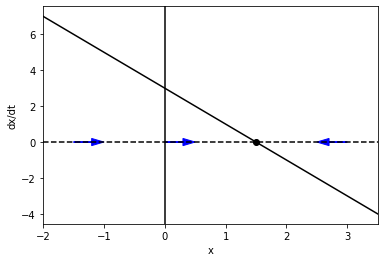

In [ ]:
n=50

x_punto=np.zeros(n)
x=np.linspace(-2,3.5,n)

for i in np.arange(0,n):
  x_punto[i]=-a*x[i]+b


line_y0=np.zeros(n)

plt.plot(x,x_punto,color='black')
plt.scatter(b/a,0, color='black') #, facecolors='none'
plt.plot(x,line_y0,'k--')
#plt.axhline(color='black')
plt.axvline(color='black')
plt.arrow(0,0,0.5,0,color='blue', length_includes_head=True,head_width=0.4, head_length=0.2)
plt.arrow(3,0,-0.5,0,color='blue', length_includes_head=True,head_width=0.4, head_length=0.2)
plt.arrow(-1.5,0,0.5,0,color='blue', length_includes_head=True,head_width=0.4, head_length=0.2)
plt.xlim(-2,3.5)
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.show()

# **Ejercicio 2**


La ecuación logística es

$$\dot{N} = rN\bigg(1-\frac{N}{K}\bigg)$$
donde $r>0$ representa una taza de reproducción y $K>0$ una capacidad de carga.

1.Determine los puntos fijos.

2.Determine la estabilidad de los puntos fijos.

3.Utilice el integrador de Runge Kutta de orden 4 para calcular y graficar usando $k=100$ pasos de integración en $t\in [0,5]$ para $r=1$, $K=1$ y:

a. $N(0)=0.1K$

b. $N(0)=0.7K$

c. $N(0)=1.2K$

4.Grafique con lineas punteadas la solución exacta en donde la condición inicial viene dada por $N(0)=Kx_0$:$$x(t) = \frac{\frac{x_0}{1-x_0}e^{rt}}{1+\frac{x_0}{1-x_0}e^{rt}}$$

5.Repita 2.3 y 2.4 para $r=0.25$ y $r=4$.

6.Discuta lo observado hasta el momento.

7.Grafique $\dot{x}=f(x)$ vs $x$ para $x\in [0,1.25]$, $r=1$ y $K=1$. Incluya:

a. Los puntos fijos, en blanco los linealmente inestables, en negro los linealmente estables y en amarillo los linealmente marginales.

b. Con una línea punteada gris, la curva $\dot{x}=0$.

c. Flechas azules que indiquen la dirección de la velocidad.

d. En verde, el punto de máxima velocidad.

8.Observe en los puntos 2.3 y 2.5 que la curva del caso a. presenta un cambio de concavidad y mientras que la curva del caso b. no lo hace. Use el gráfico del punto 2.7 para explicar lo que ocurre.1.

1. Puntos fijos del sistema

$\dot{N}=0$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$  $ rN\bigg(1-\frac{N}{K}\bigg)=0$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ 
$N_1=0$ $\hspace{0.3cm}$ , $\hspace{0.3cm}$  $N_2=K$

2. Estabilidad de los puntos fijos

$\dot{N}=f(N)$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$  $ rN\bigg(1-\frac{N}{K}\bigg)=f(N)$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ $f'(N)=r-2\frac{r}{K} N$

Para $N_1=0$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ $f'(0)=r>0$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ Punto fijo inestable

Para $N_2=K$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ $f'(0)=-r<0$ $\hspace{0.3cm}$  $\rightarrow$  $\hspace{0.3cm}$ Punto fijo estable


3.

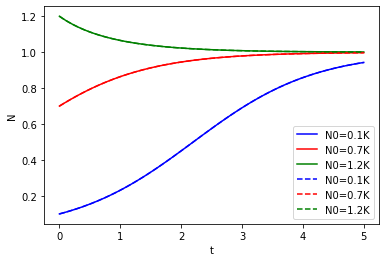

In [ ]:
r=1
K=1
m=100

t=np.linspace(0,5,m)



N1=np.zeros(m)
N2=np.zeros(m)
N3=np.zeros(m)

N1[0]=0.1*K
N2[0]=0.7*K
N3[0]=1.2*K

def f(N,t,r,K):
  y=r*N*(1-N/K)
  return y

dt=t[1]-t[0]
for i in np.arange(0,m-1):
  
  #Primera Condición inicial
  k11 = f(N1[i],t,r,K)
  k21 = f(N1[i]+0.5*dt*k11,t[i]+0.5*dt,r,K)
  k31 = f(N1[i]+0.5*dt*k21,t[i]+0.5*dt,r,K)
  k41 = f(N1[i]+dt*k31,t[i]+dt,r,K)

  N1[i+1]=N1[i]+dt*(k11+2.0*k21+2.0*k31+k41)/6.0

  #Segunda condición inicial
  k12 = f(N2[i],t,r,K)
  k22 = f(N2[i]+0.5*dt*k12,t[i]+0.5*dt,r,K)
  k32 = f(N2[i]+0.5*dt*k22,t[i]+0.5*dt,r,K)
  k42 = f(N2[i]+dt*k32,t[i]+dt,r,K)

  N2[i+1]=N2[i]+dt*(k12+2.0*k22+2.0*k32+k42)/6.0


  #Tercera condición inicial
  k13 = f(N3[i],t,r,K)
  k23 = f(N3[i]+0.5*dt*k13,t[i]+0.5*dt,r,K)
  k33 = f(N3[i]+0.5*dt*k23,t[i]+0.5*dt,r,K)
  k43 = f(N3[i]+dt*k33,t[i]+dt,r,K)

  N3[i+1]=N3[i]+dt*(k13+2.0*k23+2.0*k33+k43)/6.0




#Soluciones exactas
N1_exacto=np.zeros(m)
N2_exacto=np.zeros(m)
N3_exacto=np.zeros(m)
#x_real[0]=x0
for i in np.arange(0,m):
  N1_exacto[i]=N1[0]/(1-N1[0])*np.exp(r*t[i])/(1+N1[0]/(1-N1[0])*np.exp(r*t[i]))
  N2_exacto[i]=N2[0]/(1-N2[0])*np.exp(r*t[i])/(1+N2[0]/(1-N2[0])*np.exp(r*t[i]))
  N3_exacto[i]=N3[0]/(1-N3[0])*np.exp(r*t[i])/(1+N3[0]/(1-N3[0])*np.exp(r*t[i]))




plt.plot(t,N1,color='blue',label='N0=0.1K')
plt.plot(t,N2,color='red',label='N0=0.7K')
plt.plot(t,N3,color='green',label='N0=1.2K')
plt.plot(t,N1_exacto,'b--',label='N0=0.1K')
plt.plot(t,N2_exacto,'r--',label='N0=0.7K')
plt.plot(t,N3_exacto,'g--',label='N0=1.2K')

plt.xlabel('t')
plt.ylabel('N')
plt.legend(loc='lower right')
plt.show()

5. Repetir 3 y 4 para $r=0.25$ y $r=4$.

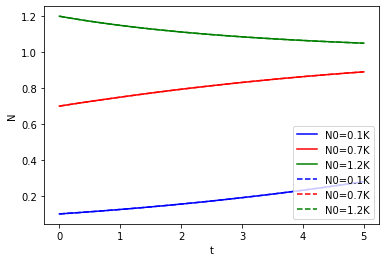

In [ ]:
r=0.25
K=1
m=100

t=np.linspace(0,5,m)



N1=np.zeros(m)
N2=np.zeros(m)
N3=np.zeros(m)

N1[0]=0.1*K
N2[0]=0.7*K
N3[0]=1.2*K

def f(N,t,r,K):
  y=r*N*(1-N/K)
  return y

dt=t[1]-t[0]
for i in np.arange(0,m-1):
  
  #Primera Condición inicial
  k11 = f(N1[i],t,r,K)
  k21 = f(N1[i]+0.5*dt*k11,t[i]+0.5*dt,r,K)
  k31 = f(N1[i]+0.5*dt*k21,t[i]+0.5*dt,r,K)
  k41 = f(N1[i]+dt*k31,t[i]+dt,r,K)

  N1[i+1]=N1[i]+dt*(k11+2.0*k21+2.0*k31+k41)/6.0

  #Segunda condición inicial
  k12 = f(N2[i],t,r,K)
  k22 = f(N2[i]+0.5*dt*k12,t[i]+0.5*dt,r,K)
  k32 = f(N2[i]+0.5*dt*k22,t[i]+0.5*dt,r,K)
  k42 = f(N2[i]+dt*k32,t[i]+dt,r,K)

  N2[i+1]=N2[i]+dt*(k12+2.0*k22+2.0*k32+k42)/6.0


  #Tercera condición inicial
  k13 = f(N3[i],t,r,K)
  k23 = f(N3[i]+0.5*dt*k13,t[i]+0.5*dt,r,K)
  k33 = f(N3[i]+0.5*dt*k23,t[i]+0.5*dt,r,K)
  k43 = f(N3[i]+dt*k33,t[i]+dt,r,K)

  N3[i+1]=N3[i]+dt*(k13+2.0*k23+2.0*k33+k43)/6.0




#Soluciones exactas
N1_exacto=np.zeros(m)
N2_exacto=np.zeros(m)
N3_exacto=np.zeros(m)
#x_real[0]=x0
for i in np.arange(0,m):
  N1_exacto[i]=N1[0]/(1-N1[0])*np.exp(r*t[i])/(1+N1[0]/(1-N1[0])*np.exp(r*t[i]))
  N2_exacto[i]=N2[0]/(1-N2[0])*np.exp(r*t[i])/(1+N2[0]/(1-N2[0])*np.exp(r*t[i]))
  N3_exacto[i]=N3[0]/(1-N3[0])*np.exp(r*t[i])/(1+N3[0]/(1-N3[0])*np.exp(r*t[i]))




plt.plot(t,N1,color='blue',label='N0=0.1K')
plt.plot(t,N2,color='red',label='N0=0.7K')
plt.plot(t,N3,color='green',label='N0=1.2K')
plt.plot(t,N1_exacto,'b--',label='N0=0.1K')
plt.plot(t,N2_exacto,'r--',label='N0=0.7K')
plt.plot(t,N3_exacto,'g--',label='N0=1.2K')

plt.xlabel('t')
plt.ylabel('N')
plt.legend(loc='lower right')
plt.show()

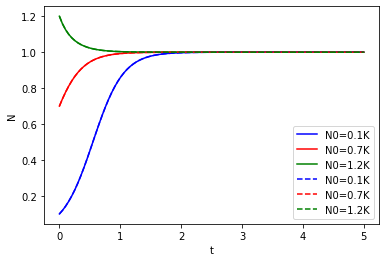

In [ ]:
r=4
K=1
m=100

t=np.linspace(0,5,m)



N1=np.zeros(m)
N2=np.zeros(m)
N3=np.zeros(m)

N1[0]=0.1*K
N2[0]=0.7*K
N3[0]=1.2*K

def f(N,t,r,K):
  y=r*N*(1-N/K)
  return y

dt=t[1]-t[0]
for i in np.arange(0,m-1):
  
  #Primera Condición inicial
  k11 = f(N1[i],t,r,K)
  k21 = f(N1[i]+0.5*dt*k11,t[i]+0.5*dt,r,K)
  k31 = f(N1[i]+0.5*dt*k21,t[i]+0.5*dt,r,K)
  k41 = f(N1[i]+dt*k31,t[i]+dt,r,K)

  N1[i+1]=N1[i]+dt*(k11+2.0*k21+2.0*k31+k41)/6.0

  #Segunda condición inicial
  k12 = f(N2[i],t,r,K)
  k22 = f(N2[i]+0.5*dt*k12,t[i]+0.5*dt,r,K)
  k32 = f(N2[i]+0.5*dt*k22,t[i]+0.5*dt,r,K)
  k42 = f(N2[i]+dt*k32,t[i]+dt,r,K)

  N2[i+1]=N2[i]+dt*(k12+2.0*k22+2.0*k32+k42)/6.0


  #Tercera condición inicial
  k13 = f(N3[i],t,r,K)
  k23 = f(N3[i]+0.5*dt*k13,t[i]+0.5*dt,r,K)
  k33 = f(N3[i]+0.5*dt*k23,t[i]+0.5*dt,r,K)
  k43 = f(N3[i]+dt*k33,t[i]+dt,r,K)

  N3[i+1]=N3[i]+dt*(k13+2.0*k23+2.0*k33+k43)/6.0




#Soluciones exactas
N1_exacto=np.zeros(m)
N2_exacto=np.zeros(m)
N3_exacto=np.zeros(m)
#x_real[0]=x0
for i in np.arange(0,m):
  N1_exacto[i]=N1[0]/(1-N1[0])*np.exp(r*t[i])/(1+N1[0]/(1-N1[0])*np.exp(r*t[i]))
  N2_exacto[i]=N2[0]/(1-N2[0])*np.exp(r*t[i])/(1+N2[0]/(1-N2[0])*np.exp(r*t[i]))
  N3_exacto[i]=N3[0]/(1-N3[0])*np.exp(r*t[i])/(1+N3[0]/(1-N3[0])*np.exp(r*t[i]))




plt.plot(t,N1,color='blue',label='N0=0.1K')
plt.plot(t,N2,color='red',label='N0=0.7K')
plt.plot(t,N3,color='green',label='N0=1.2K')
plt.plot(t,N1_exacto,'b--',label='N0=0.1K')
plt.plot(t,N2_exacto,'r--',label='N0=0.7K')
plt.plot(t,N3_exacto,'g--',label='N0=1.2K')

plt.xlabel('t')
plt.ylabel('N')
plt.legend(loc='lower right')
plt.show()

6.Según lo analizado, el parámetro $r$ regula el tiempo que tarda el sistema en alcanzar el equilibrio. Cuando mayor es el valor de $r$ el sistema se equilibra más rápido

7.

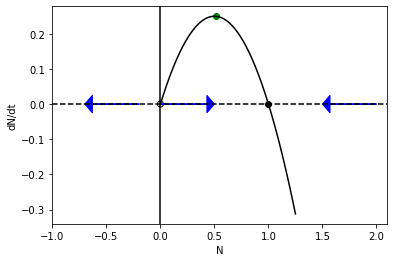

In [ ]:
m=50

r=1
K=1

N_punto=np.zeros(m)
N=np.linspace(0,1.25,m)

for i in np.arange(0,m):
  N_punto[i]=r*N[i]*(1-N[i]/K)

vel_max=np.amax(N_punto)

for i in np.arange(0,m):
  if N_punto[i]==vel_max:
    pos_vel_max=N[i]


line_y0=np.zeros(m)
x_axis=np.linspace(-1,2.1,50)

plt.plot(N,N_punto,color='black')
plt.scatter(0,0, facecolors='none', color='black') #
plt.scatter(K,0, color='black')
plt.scatter(pos_vel_max,vel_max, color='green')
plt.plot(x_axis,line_y0,'k--')
#plt.axhline(color='black')
plt.axvline(color='black')
plt.arrow(0,0,0.5,0,color='blue', length_includes_head=True,head_width=0.05, head_length=0.07)
plt.arrow(2,0,-0.5,0,color='blue', length_includes_head=True,head_width=0.05, head_length=0.07)
plt.arrow(-0.2,0,-0.5,0,color='blue', length_includes_head=True,head_width=0.05, head_length=0.07)
plt.xlim(-1,2.1)
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.show()

8. Analizando el gráfico obtenido en el punto 2.7 uno puede explicar la diferencia de cambios de concavidad observados en los puntos 2.3 y 2.5. Para el caso a, donde $N_0=0.1K$, el sistema se encuentra a izquierda del máximo de velocidad, y tiende al punto fijo estable, por eso primero se acelera, alcanza el máximo de velocidad y luego se desacelera.

  Por otro lado, para el caso b, $N_0=0.7K$, el sistema se encuentra en un N mayor al correspondiente de velocidad máxima y tiende al punto fijo estable desacelerandose todo el tiempo.